If you want to type along with me, head to [this notebook](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fbethanyj0%2Fdata111_fa24&branch=main&urlpath=tree%2Fdata111_fa24%2Flectures%2Flec16_live.ipynb) instead. If you prefer follow along by executing the cells, stay in this notebook.

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Random Sampling ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination and how long they were delayed, in minutes.

In [3]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


Some deterministic samples:

In [10]:
united.take(np.arange(10))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [17]:
united.where('Destination','JFK')

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


In [21]:
united.take(np.arange(0,united.num_rows,1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [22]:
united.take(make_array(3,8,27))

Row,Date,Flight Number,Destination,Delay
3,6/1/15,250,SAN,0
8,6/1/15,300,HNL,20
27,6/1/15,522,PDX,36


A random sample:

In [27]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
904,6/7/15,361,LIH,-9
1904,6/13/15,1583,EWR,-4
2904,6/20/15,522,PDX,10
3904,6/26/15,1743,LAX,-4
4904,7/3/15,1723,KOA,-7
5904,7/10/15,1257,ANC,7
6904,7/17/15,401,CLE,-2
7904,7/23/15,1593,EWR,-4
8904,7/30/15,580,PDX,-1
9904,8/5/15,1586,ORD,0


## Distributions ##

In [28]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [29]:
die.sample(10)

Face
6
1
4
1
5
3
6
5
5
4


In [30]:
roll_bins = np.arange(0.5, 6.6, 1)

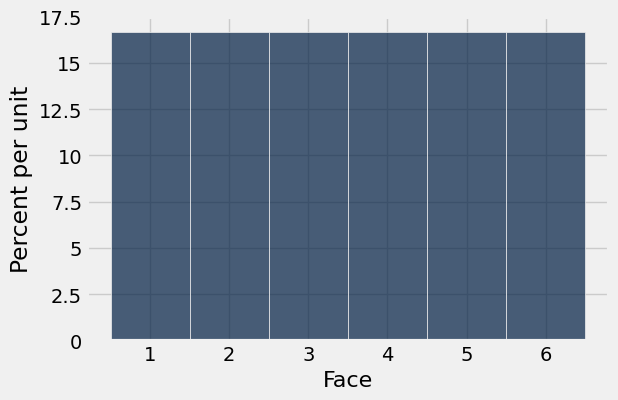

In [31]:
die.hist('Face',bins=roll_bins)

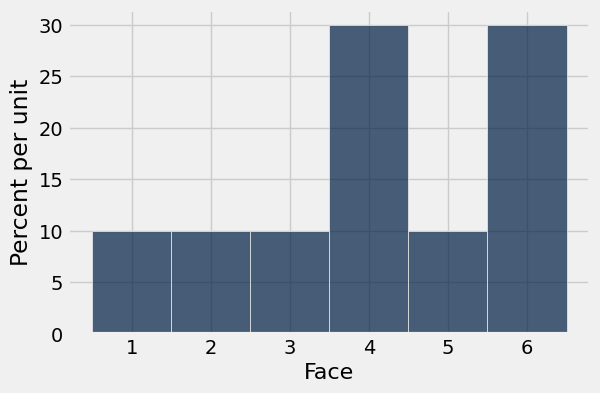

In [41]:
die.sample(10).hist('Face',bins=roll_bins)

**Activity:** Simulate 1000 rolls of a die and plot the empirical distribution. What do you notice about this distribution compared to the 10 rolls. 

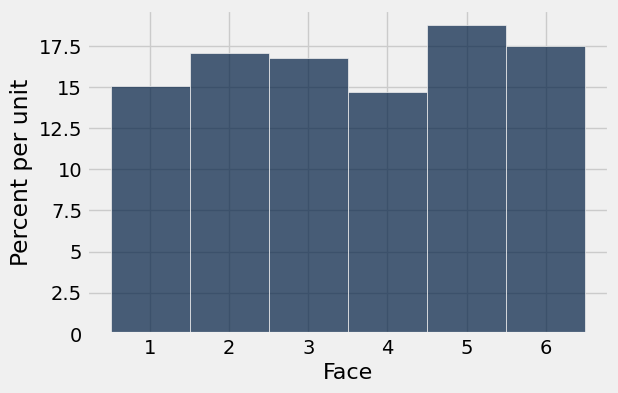

In [49]:
die.sample(1000).hist('Face',bins=roll_bins)

**Activity:** Simulate 10000 rolls of a die and plot the empirical distribution. What do you notice?

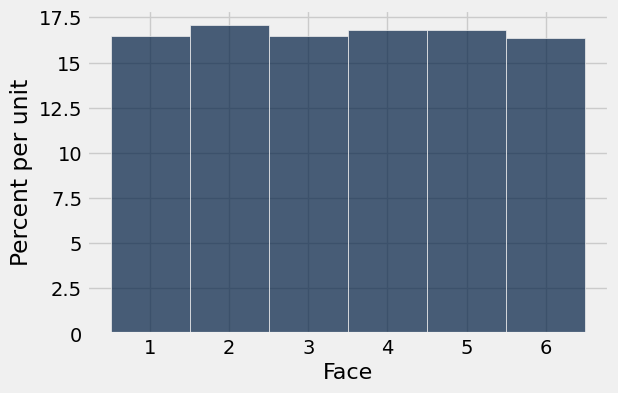

In [56]:
die.sample(10000).hist('Face',bins=roll_bins)

## Large Random Samples ##

In [57]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


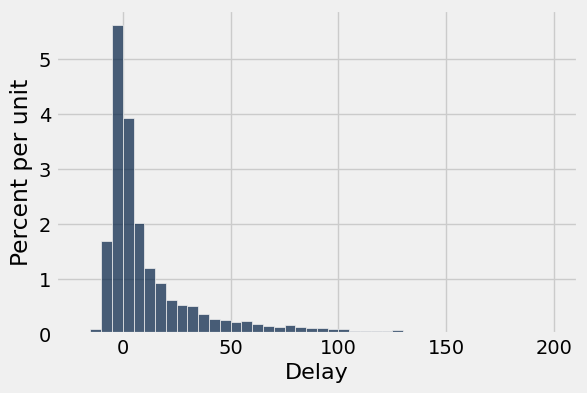

In [58]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [59]:
min(united.column('Delay'))

-16

In [60]:
max(united.column('Delay'))

580

In [61]:
np.average(united.column('Delay'))

16.658155515370705

**Activity:** Draw 10 samples from the `united` table and plot the distribution of delay times. What do you observe?

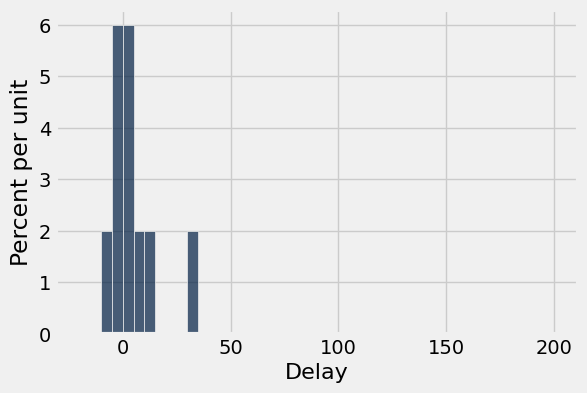

In [68]:
united.sample(10).hist('Delay', bins = united_bins)

**Activity:** Draw 1000 samples from the `united` table and plot the distribution of delay times. What do you observe?

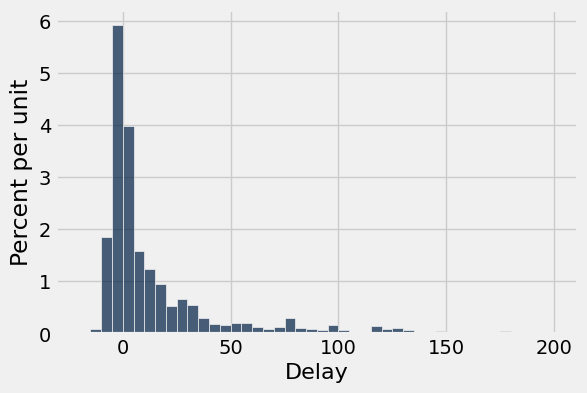

In [73]:
united.sample(1000).hist('Delay', bins = united_bins)

## Statistics

In [74]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [87]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

26.0

In [110]:
# (Sample) Statistic
np.median(united.sample(1000).column('Delay'))

2.0

### Probability & Empirical Distributions of a Statistic

In [111]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [120]:
sample_median(10)

2.0

In [121]:
num_simulations = 2000

In [122]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

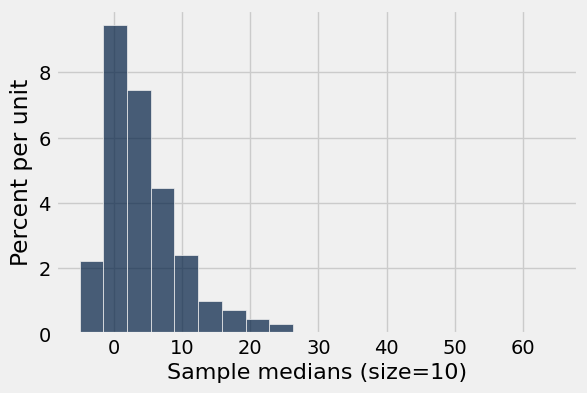

In [123]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [124]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

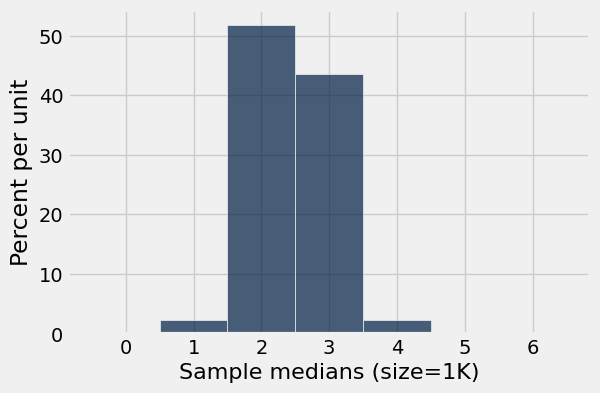

In [125]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist(bins = np.arange(-0.5,7.5))

#### Empirical Distributions of a Statistic (Overlayed)

In [126]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [127]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

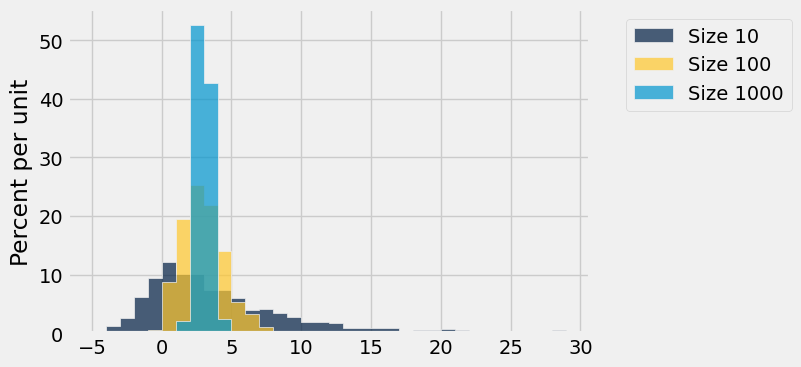

In [128]:
sample_medians.hist(bins = np.arange(-5, 30))

## Sample Proportions

Say I have an unfair coin. With 40% chance of flipping heads and 60% chance of flipping tails.

In [ ]:
unfair_coin_proportions = make_array(0.4,0.6)


## Swain vs. Alabama ##

In [ ]:
population_proportions = make_array(.26, .74)
population_proportions

In [ ]:
sample_proportions(100, population_proportions)

In [ ]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [ ]:
panel_proportion()

In [ ]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

In [ ]:
Table().with_column(
    'Number of Black Men on Panel of 100', panels
).hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);